In [2]:
# pip install panadas numpy matplotlib seaborn openpyxl scikit-learn

In [3]:
import pandas as pd
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
df=pd.read_excel('data/Telco_customer_churn.xlsx')
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [4]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [5]:
df.nunique()

CustomerID           7043
Count                   1
Country                 1
State                   1
City                 1129
Zip Code             1652
Lat Long             1652
Latitude             1652
Longitude            1651
Gender                  2
Senior Citizen          2
Partner                 2
Dependents              2
Tenure Months          73
Phone Service           2
Multiple Lines          3
Internet Service        3
Online Security         3
Online Backup           3
Device Protection       3
Tech Support            3
Streaming TV            3
Streaming Movies        3
Contract                3
Paperless Billing       2
Payment Method          4
Monthly Charges      1585
Total Charges        6531
Churn Label             2
Churn Value             2
Churn Score            85
CLTV                 3438
Churn Reason           20
dtype: int64

In [6]:
df.shape

(7043, 33)

In [7]:
df['Churn Label'].value_counts()

Churn Label
No     5174
Yes    1869
Name: count, dtype: int64

In [8]:
df.shape

(7043, 33)

In [9]:
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df2= df.drop(['Country','State','Count','Zip Code','Churn Reason','City','Churn Score','Churn Label','CLTV','CustomerID','Lat Long',
                    'Latitude','Longitude', 'Total Charges'], axis = 1)
df2.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Churn Value
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,1
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,1
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,1
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,1
4,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,1


In [12]:
reason= df['Churn Reason'].value_counts()
reason

Churn Reason
Attitude of support person                   192
Competitor offered higher download speeds    189
Competitor offered more data                 162
Don't know                                   154
Competitor made better offer                 140
Attitude of service provider                 135
Competitor had better devices                130
Network reliability                          103
Product dissatisfaction                      102
Price too high                                98
Service dissatisfaction                       89
Lack of self-service on Website               88
Extra data charges                            57
Moved                                         53
Lack of affordable download/upload speed      44
Limited range of services                     44
Long distance charges                         44
Poor expertise of phone support               20
Poor expertise of online support              19
Deceased                                       6
Name: c

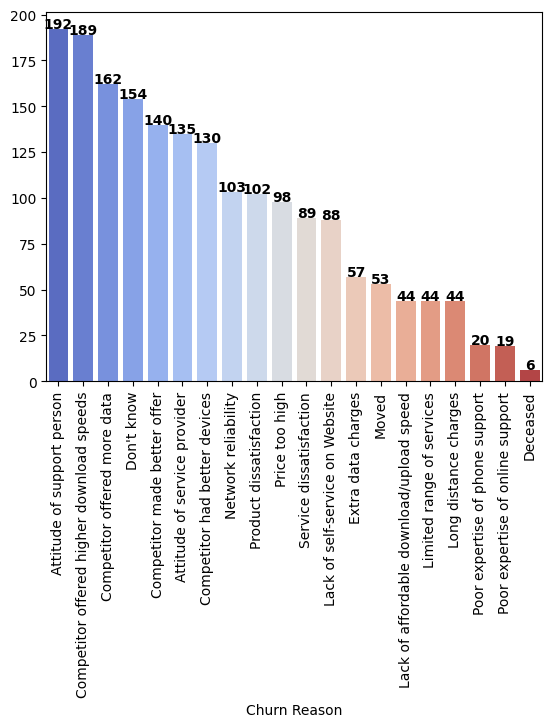

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
x= reason.index
y = reason.values
sns.barplot(x=x, y =y, palette= 'coolwarm',hue= x)
# Add count labels at the end of each bar
for i, v in enumerate(y):
    plt.text(i, v + 0.5, str(v), ha='center', fontweight='bold')

plt.xticks(rotation = 90)
plt.show()


In [14]:
pie_plot= df['Gender'].value_counts()
pie_plot

Gender
Male      3555
Female    3488
Name: count, dtype: int64

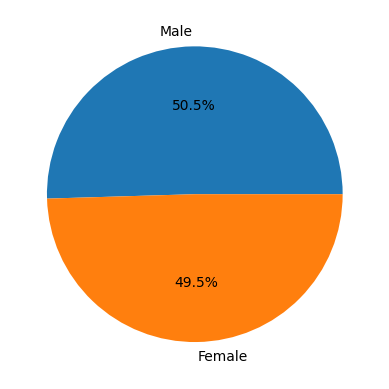

In [15]:
plt.pie(pie_plot.values,labels =pie_plot.index, autopct='%1.1f%%')
plt.show()

In [16]:
churn_value = df['Churn Value'].value_counts()
churn_value

Churn Value
0    5174
1    1869
Name: count, dtype: int64

<Axes: xlabel='Churn Value'>

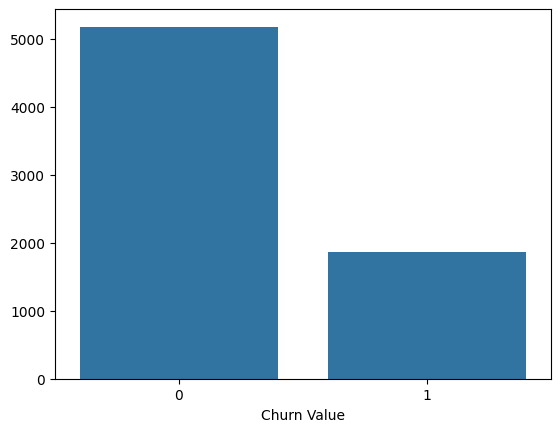

In [17]:
sns.barplot(x=churn_value.index, y=churn_value.values)

In [18]:
df2.nunique()

Gender                  2
Senior Citizen          2
Partner                 2
Dependents              2
Tenure Months          73
Phone Service           2
Multiple Lines          3
Internet Service        3
Online Security         3
Online Backup           3
Device Protection       3
Tech Support            3
Streaming TV            3
Streaming Movies        3
Contract                3
Paperless Billing       2
Payment Method          4
Monthly Charges      1585
Churn Value             2
dtype: int64

In [19]:
df2.dtypes

Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Churn Value            int64
dtype: object

In [20]:
df2.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Churn Value
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,1
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,1
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,1
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,1
4,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,1


In [68]:
import sklearn
from sklearn.preprocessing import LabelEncoder
df3= df2.copy()

for col in df3.columns:
    if df3[col].nunique() <= 2:
        le = LabelEncoder()
        df3[col] = le.fit_transform(df3[col])
    elif df3[col].dtypes=='object':
       dummy=pd.get_dummies(df3[col],prefix = col)
       df3=pd.concat([df3.drop(col,axis =1),dummy],axis=1)
df3.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Paperless Billing,Monthly Charges,Churn Value,Multiple Lines_No,Multiple Lines_No phone service,Multiple Lines_Yes,Internet Service_DSL,Internet Service_Fiber optic,Internet Service_No,Online Security_No,Online Security_No internet service,Online Security_Yes,Online Backup_No,Online Backup_No internet service,Online Backup_Yes,Device Protection_No,Device Protection_No internet service,Device Protection_Yes,Tech Support_No,Tech Support_No internet service,Tech Support_Yes,Streaming TV_No,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,1,0,0,0,2,1,1,53.85,1,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True
1,0,0,0,1,2,1,1,70.70,1,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False
2,0,0,0,1,8,1,1,99.65,1,False,False,True,False,True,False,True,False,False,True,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,False,False,False,True,False
3,0,0,1,1,28,1,1,104.80,1,False,False,True,False,True,False,True,False,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False,True,True,False,False,False,False,True,False
4,1,0,0,1,49,1,1,103.70,1,False,False,True,False,True,False,True,False,False,False,False,True,False,False,True,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,False


In [69]:
for col in df3:
    if df3[col].dtypes == 'bool':
        df3[col]=df3[col].astype('int64')

In [70]:
df3.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Paperless Billing,Monthly Charges,Churn Value,Multiple Lines_No,Multiple Lines_No phone service,Multiple Lines_Yes,Internet Service_DSL,Internet Service_Fiber optic,Internet Service_No,Online Security_No,Online Security_No internet service,Online Security_Yes,Online Backup_No,Online Backup_No internet service,Online Backup_Yes,Device Protection_No,Device Protection_No internet service,Device Protection_Yes,Tech Support_No,Tech Support_No internet service,Tech Support_Yes,Streaming TV_No,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,1,0,0,0,2,1,1,53.85,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
1,0,0,0,1,2,1,1,70.70,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
2,0,0,0,1,8,1,1,99.65,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0
3,0,0,1,1,28,1,1,104.80,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0
4,1,0,0,1,49,1,1,103.70,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0


In [71]:
df3.shape

(7043, 40)

In [72]:
# Assuming your label column is called 'label'
cols = ['Churn Value'] + [col for col in df3.columns if col != 'Churn Value']
df3 = df3[cols]

In [74]:
df3.head()

,Churn Value,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Paperless Billing,Monthly Charges,Multiple Lines_No,Multiple Lines_No phone service,Multiple Lines_Yes,Internet Service_DSL,Internet Service_Fiber optic,Internet Service_No,Online Security_No,Online Security_No internet service,Online Security_Yes,Online Backup_No,Online Backup_No internet service,Online Backup_Yes,Device Protection_No,Device Protection_No internet service,Device Protection_Yes,Tech Support_No,Tech Support_No internet service,Tech Support_Yes,Streaming TV_No,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,1,1,0,0,0,2,1,1,53.85,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
1,1,0,0,0,1,2,1,1,70.70,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
2,1,0,0,0,1,8,1,1,99.65,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0
3,1,0,0,1,1,28,1,1,104.80,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0
4,1,1,0,0,1,49,1,1,103.70,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0


In [77]:
X = df3.drop('Churn Value', axis=1)
y = df3['Churn Value']

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#split data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42) 

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [99]:
from sklearn.feature_selection import SelectKBest, f_classif
anova=SelectKBest(score_func=f_classif, k=15)
anova.fit(X_train,y_train)
anova_features=X.columns[anova.get_support()]
print("ANOVA selected:", list(anova_features))

ANOVA selected: ['Dependents', 'Tenure Months', 'Internet Service_Fiber optic', 'Online Security_No', 'Online Backup_No', 'Online Backup_No internet service', 'Device Protection_No', 'Device Protection_No internet service', 'Tech Support_No', 'Tech Support_No internet service', 'Streaming TV_No internet service', 'Streaming Movies_No internet service', 'Contract_Month-to-month', 'Contract_Two year', 'Payment Method_Electronic check']


In [ ]:
from sklearn.feature_selection import chi2

chi= SelectKBest(score_func = chi2, k=15)
chi.fit(X_train,y_train)
chi_features = X.columns[chi.get_support()]
print('Chi Selected', list(chi_features))

Chi Selected ['Dependents', 'Internet Service_Fiber optic', 'Internet Service_No', 'Online Security_No', 'Online Security_No internet service', 'Online Backup_No', 'Online Backup_No internet service', 'Device Protection_No internet service', 'Tech Support_No', 'Tech Support_No internet service', 'Streaming TV_No internet service', 'Streaming Movies_No internet service', 'Contract_Month-to-month', 'Contract_Two year', 'Payment Method_Electronic check'] SelectKBest(k=15, score_func=<function chi2 at 0x00000224E66F8D60>)


In [106]:
from sklearn.feature_selection import mutual_info_classif

mutual= SelectKBest(score_func = mutual_info_classif,  k=15)
mutual.fit(X_train,y_train)
selected_indices=mutual.get_support(indices=True)
mutual_features = X.columns[selected_indices]
print('Mutal Selected Features', list(mutual_features))



Mutal Selected Features ['Dependents', 'Tenure Months', 'Monthly Charges', 'Internet Service_Fiber optic', 'Internet Service_No', 'Online Security_No', 'Online Security_No internet service', 'Online Backup_No', 'Online Backup_No internet service', 'Device Protection_No internet service', 'Tech Support_No', 'Tech Support_No internet service', 'Contract_Month-to-month', 'Contract_Two year', 'Payment Method_Electronic check']


In [127]:
print('Top 15 Mutual scores')
score = pd.DataFrame({'Feature':X.columns,
                      'mutual_scores':mutual.scores_})
score.sort_values('mutual_scores',ascending=False,inplace=True)
score

Top 15 Mutual scores


,Feature,mutual_scores
32,Contract_Month-to-month,0.099713
4,Tenure Months,0.074956
23,Tech Support_No,0.063461
34,Contract_Two year,0.059975
14,Online Security_No,0.057985
7,Monthly Charges,0.047573
12,Internet Service_Fiber optic,0.046145
3,Dependents,0.044792
37,Payment Method_Electronic check,0.040991
24,Tech Support_No internet service,0.040467


In [130]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

rfe=RandomForestClassifier(random_state=42)
rfe_selector= RFE(rfe,n_features_to_select=15)
rfe_selector.fit(X_train,y_train)
rfe_features = X.columns[rfe_selector.get_support()]
print('RFE Selected',list(rfe_features))

RFE Selected ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months', 'Paperless Billing', 'Monthly Charges', 'Multiple Lines_No', 'Internet Service_Fiber optic', 'Online Security_No', 'Online Backup_No', 'Device Protection_No', 'Tech Support_No', 'Contract_Month-to-month', 'Payment Method_Electronic check']


In [132]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

importances = model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

embedded_features = importance_df['Feature'].head(10).tolist()
print("Embedded (Tree-based) selected:", embedded_features)


Embedded (Tree-based) selected: ['Tenure Months', 'Monthly Charges', 'Contract_Month-to-month', 'Dependents', 'Online Security_No', 'Gender', 'Partner', 'Payment Method_Electronic check', 'Paperless Billing', 'Tech Support_No']


In [ ]:
methods={
    'ANOVA':list(anova_features),
    'Chi2':list(chi_features),
    'MutualInfo':list(mutual_features),
    'RFE':list(rfe_features),
    'Embedded':list(embedded_features)
}
from collections import Counter

all_features = [f for features in methods.values() for f in features]
feature_count=Counter(all_features)
best_features=[f for f,count in feature_count.items() if count>3]
print('Final Selected Features',best_features)

Final Selected Features ['Dependents', 'Tenure Months', 'Internet Service_Fiber optic', 'Online Security_No', 'Online Backup_No', 'Tech Support_No', 'Contract_Month-to-month', 'Payment Method_Electronic check']


In [149]:
# Create a boolean mask for all columns
mask = [col in best_features for col in X.columns]

# Apply the boolean mask
X_train_selected = X_train[:, mask]
X_test_selected = X_test[:, mask]

print(f"Selected features: {best_features}")
print(f"New shape: {X_train_selected.shape}")

Selected features: ['Dependents', 'Tenure Months', 'Internet Service_Fiber optic', 'Online Security_No', 'Online Backup_No', 'Tech Support_No', 'Contract_Month-to-month', 'Payment Method_Electronic check']
New shape: (4930, 8)
